### Etude sur Introduction aux réseaux de neurones artificiels 1 - régression

La régression par un perceptron multi-couche sera illustrée dans un Jupyter Notebook sur l'exemple du Boston house prices dataset. Inspirez-vous de la ligne de code suivante (sklearn) :

ボストンの住宅価格のデータセットを例に、多層パーセプトロンによる回帰をJupyter Notebookで説明

    MLPRegressor(hidden_layer_sizes='à définir', activation='à définir', solver='lbfgs', alpha=0.0001, max_iter=10000, random_state=0, max_fun=15000)


### préparation des data

### 1 - Importation des librairies Python nécessaires à la résolution du problème

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import neural_network 
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

### 2 - Chargement des données du Boston Housing Dataset Boston

In [2]:
# Load data
boston = datasets.load_boston()

C:\Users\utilisateur\anaconda3\envs\simplon\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californi

In [3]:
# Creating Regression Design Matrix 
X = boston.data
# Creating target dataset
y = boston.target

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 3 - afficher le dataFrame Boston

In [5]:
df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
dtype: bool

### 4 - afficher le correlation matrix

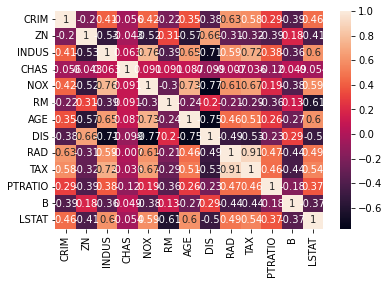

In [7]:
#plt.figure(1, figsize=(8, 8), dpi=100)
correlation_matrix = df.corr().round(3)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

RAD      index of accessibility to radial highways

TAX      full-value property-tax rate per $10,000

### 5 - spiliter les données pour train et test

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

### 6 - feature scaling

In [10]:
# standardization 標準化 平均0、分散1
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)

In [11]:
X_test_sc = sc.transform(X_test)

In [12]:
X_test_sc

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [13]:
# normalisation
ms = MinMaxScaler()
X_train_ms = ms.fit_transform(X_train)
X_test_ms = ms.transform(X_test)

### 7 - exportation des données

In [14]:
joblib.dump(X_train_sc, "X_train.joblib")

['X_train.joblib']

In [15]:
joblib.dump(X_test_sc, "X_test.joblib")

['X_test.joblib']

In [16]:
joblib.dump(y_train, "y_train.joblib")
joblib.dump(y_test, "y_test.joblib")

['y_test.joblib']

In [17]:
joblib.dump(X_train_ms, "X_train_ms.joblib")
joblib.dump(X_test_ms, "X_test_ms.joblib")

['X_test_ms.joblib']

https://liaoyuan.hatenablog.jp/entry/2018/02/03/004849